**Assignment 5: Artificial Neural Network: feedforward**
*   Nelly Fernanda torres Ramírez 2014788
*   Leyanet Piedra Llanes 2011260
*   Ana Sofía Vara Buentello 2109189
*   Guillermo Gil Flores 1963954
*   Mauricio Alejandro Olivares Mata 1973006

Teacher: Daniel Isaías López Páez  
Class: Artificial Intelligence   
Class schedule: N4, 3

Epoch 1/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8091 - loss: 0.6990 - val_accuracy: 0.9366 - val_loss: 0.2238
Epoch 2/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9419 - loss: 0.2097 - val_accuracy: 0.9514 - val_loss: 0.1689
Epoch 3/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9579 - loss: 0.1460 - val_accuracy: 0.9607 - val_loss: 0.1383
Epoch 4/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9687 - loss: 0.1135 - val_accuracy: 0.9659 - val_loss: 0.1203
Epoch 5/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9737 - loss: 0.0924 - val_accuracy: 0.9689 - val_loss: 0.1052
Epoch 6/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9799 - loss: 0.0711 - val_accuracy: 0.9715 - val_loss: 0.0996
Epoch 7/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9828 - loss: 0.0620 - val_accuracy: 0.9725 - val_loss: 0.0926
Epoch 8/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9859 - loss: 0.0518 - val_accu

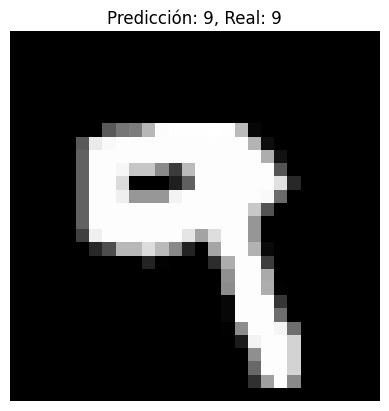

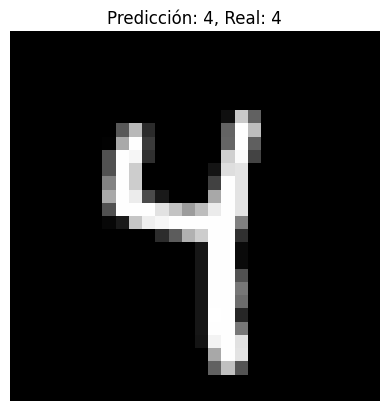

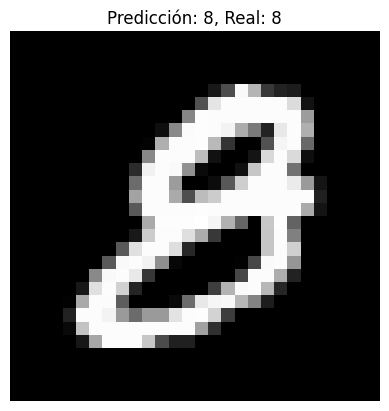

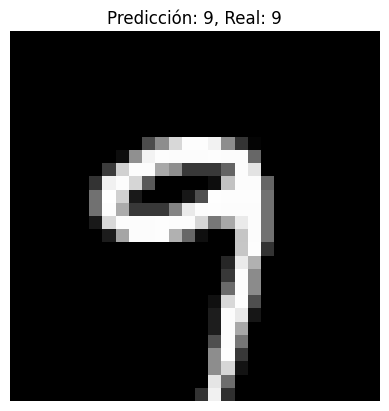

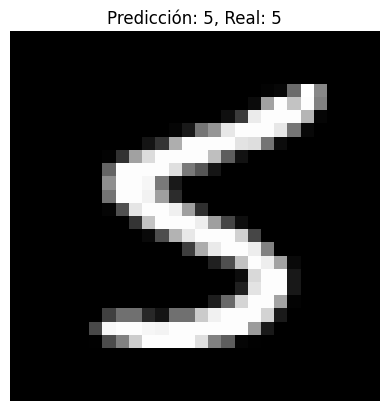

In [ ]:
# Step 1. Import necessary libraries
import numpy as np #mathematical calculations
import matplotlib.pyplot as plt #graph
from tensorflow.keras.datasets import mnist #dataset of digits
from tensorflow.keras.models import Sequential #type of layered neural network model
from tensorflow.keras.layers import Dense, Flatten #types of layers
from tensorflow.keras.utils import to_categorical #converts labels to vectors for use in classification
from tensorflow.keras.callbacks import EarlyStopping #to stop automatically

# Step 2. Load the MNIST dataset (28x28 images of each number from 0 to 9)
(train_data, train_labels), (test_data, test_labels) = mnist.load_data() #loads the split dataset into data for training and evaluation

# Step 3. Normalize the data (convert to values ​​between 0 and 1)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Step 4. Encode vectors (transform labels to 10-digit vectors for the output of the network that has 10 neurons)
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

# Step 5. Create the Artificial Neural Network model
model = Sequential() #linear model, layer upon layer
model.add(Flatten(input_shape=(28, 28)))   #layer to flatten 28x28 images to 784 values
model.add(Dense(128, activation='relu'))   #hidden layer with 128 neurons and ReLU (linear rectifier) ​​activation
model.add(Dense(10, activation='softmax')) #output layer with softmax for 10 classes

# Step 6. Compile the model
model.compile(optimizer='adam', #algorithm to update the weights
              loss='categorical_crossentropy', #loss function for multi-class classification
              metrics=['accuracy']) #metric to measure performance

# Step 7. Configure early stop
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Step 8. Train the model
history = model.fit(train_data, train_labels_cat,
                    epochs=100, #maximum number of epochs allowed
                    batch_size=150, #150 images are processed at a time
                    validation_split=0.2, #20% of the data for validation
                    callbacks=[early_stop], #it will stop when there is no further improvement
                    verbose=1) #training progress

# Step 9. Evaluate the model
loss, accuracy = model.evaluate(test_data, test_labels_cat, verbose=0) #evaluates the model on the test data
print(f'\nPrecisión del modelo en datos de prueba: {accuracy:.3f}')

# Step 10. Select random numbers
random_indices = np.random.choice(len(test_data), size=5, replace=False) #choose 5 random indices without repeating

# Step 11. Make predictions
predictions = model.predict(test_data[random_indices]) #makes predictions of the 5 selected random numbers

# Step 12. Show
for i, idx in enumerate(random_indices): #loop iterates through the 5 random indices
    plt.imshow(test_data[idx], cmap='gray') #displays the idx image in grayscale
    plt.title(f'Predicción: {np.argmax(predictions[i])}, Real: {test_labels[idx]}') #returns the number with the highest probability predicted by the model and the actual label respectively
    plt.axis('off')
    plt.show()
